In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Adam import AdamOptim
from SGD import SGD
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from Logreg import LogisticRegression
from irls_optimizer import IRLS
from sklearn.preprocessing import LabelEncoder
np.seterr(divide = 'ignore') 
np.seterr(invalid='ignore')
np.seterr(over ='ignore')
from sklearn.preprocessing import StandardScaler
from scipy.io import arff

# Biodeg

## Balanced accuracy

In [182]:
arff_file = arff.loadarff('data/big/biodeg.arff')
df = pd.DataFrame(arff_file[0])

In [183]:
y = df.iloc[:,-1].astype(int).values -1
X = df.iloc[:,:-1].values

In [143]:
#All
splitting_seeds = [42, 43, 44, 45, 46]

balancedAdam = []
balancedSGD = []
balancedIRLS = []

for seed in splitting_seeds:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=seed)
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xval = scaler.transform(Xval)
    Xtest = scaler.transform(Xtest)

    
    logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
    logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
    logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
    logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    
    predAdam = logAdam.predict(Xtest)
    predSGD = logSGD.predict(Xtest)
    predIRLS = logIRLS.predict(Xtest)
    
    balancedAdam.append(balanced_accuracy_score(ytest,predAdam.round()))
    balancedSGD.append(balanced_accuracy_score(ytest,predSGD.round()))
    balancedIRLS.append(balanced_accuracy_score(ytest,predIRLS.round()))
    

    
biodegBalanced = {"adam": balancedAdam,
                    "sgd": balancedSGD,
                    "irls": balancedIRLS}









































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   8%|▊         | 38/500 [00:00<00:01, 372.67it/s]







































Epoch::  14%|█▍        | 71/500 [00:00<00:01, 355.31it/s]







































Epoch::  21%|██        | 106/500 [00:00<00:01, 351.60it/s]







































Epoch::  29%|██▊       | 143/500 [00:00<00:01, 353.89it/s]







































Epoch::  36%|███▋      | 182/500 [00:00<00:00, 328.03it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::  13%|█▎        | 65/500 [00:00<00:00, 643.77it/s]

Early stopping after epoch 194
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  24%|██▍       | 120/500 [00:00<00:00, 608.45it/s]







































Epoch::  37%|███▋      | 183/500 [00:00<00:00, 611.23it/s]







































Epoch::  49%|████▉     | 247/500 [00:00<00:00, 617.85it/s]







































Epoch::  62%|██████▏   | 312/500 [00:00<00:00, 623.60it/s]







































Epoch::  73%|███████▎  | 366/500 [00:00<00:00, 594.02it/s]







































Epoch::  84%|████████▍ | 419/500 [00:00<00:00, 569.61it/s]







































Epoch:: 100%|██████████| 500/500 [00:00<00:00, 573.57it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   0%|          | 1/500 [00:00<01:37,  5.10it/s]







































Epoch::   0%|          | 2/500 [00:00<01:31,  5.42it/s]





































Early stopping after epoch 15
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  14%|█▍        | 72/500 [00:00<00:01, 360.28it/s]







































Epoch::  22%|██▏       | 112/500 [00:00<00:01, 370.34it/s]







































Epoch::  30%|███       | 150/500 [00:00<00:00, 372.12it/s]







































Epoch::  38%|███▊      | 188/500 [00:00<00:00, 372.29it/s]







































Epoch::  47%|████▋     | 233/500 [00:00<00:00, 390.62it/s]







































Epoch::  54%|█████▍    | 269/500 [00:00<00:00, 357.35it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::  12%|█▏        | 62/500 [00:00<00:00, 608.04it/s]

Early stopping after epoch 278
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  26%|██▌       | 131/500 [00:00<00:00, 627.12it/s]







































Epoch::  38%|███▊      | 191/500 [00:00<00:00, 614.98it/s]







































Epoch::  48%|████▊     | 239/500 [00:00<00:00, 565.20it/s]







































Epoch::  58%|█████▊    | 289/500 [00:00<00:00, 540.45it/s]







































Epoch::  67%|██████▋   | 337/500 [00:00<00:00, 519.14it/s]







































Epoch::  77%|███████▋  | 384/500 [00:00<00:00, 500.19it/s]







































Epoch:: 100%|██████████| 500/500 [00:00<00:00, 549.02it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   0%|          | 1/500 [00:00<01:10,  7.04it/s]







































Epoch::   0%|          | 2/500 [00:00<01:13,  6.76it/s]





































Early stopping after epoch 7
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  12%|█▏        | 59/500 [00:00<00:01, 297.27it/s]







































Epoch::  17%|█▋        | 85/500 [00:00<00:01, 282.26it/s]







































Epoch::  24%|██▍       | 120/500 [00:00<00:01, 298.92it/s]







































Epoch::  29%|██▉       | 145/500 [00:00<00:01, 280.47it/s]







































Epoch::  35%|███▌      | 176/500 [00:00<00:01, 282.59it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::  13%|█▎        | 67/500 [00:00<00:00, 657.07it/s]

Early stopping after epoch 176
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  24%|██▍       | 121/500 [00:00<00:00, 614.90it/s]







































Epoch::  36%|███▌      | 179/500 [00:00<00:00, 602.18it/s]







































Epoch::  45%|████▌     | 227/500 [00:00<00:00, 555.63it/s]







































Epoch::  56%|█████▌    | 281/500 [00:00<00:00, 549.22it/s]







































Epoch::  68%|██████▊   | 341/500 [00:00<00:00, 560.42it/s]







































Epoch::  81%|████████  | 403/500 [00:00<00:00, 575.50it/s]







































Epoch:: 100%|██████████| 500/500 [00:00<00:00, 576.22it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   0%|          | 1/500 [00:00<01:04,  7.69it/s]







































Epoch::   0%|          | 2/500 [00:00<01:08,  7.32it/s]





































Early stopping after epoch 11
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  12%|█▏        | 60/500 [00:00<00:01, 308.62it/s]







































Epoch::  20%|█▉        | 98/500 [00:00<00:01, 309.24it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::  14%|█▎        | 68/500 [00:00<00:00, 673.47it/s]

Early stopping after epoch 99
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  27%|██▋       | 136/500 [00:00<00:00, 673.47it/s]







































Epoch::  37%|███▋      | 186/500 [00:00<00:00, 605.62it/s]







































Epoch::  50%|████▉     | 248/500 [00:00<00:00, 566.38it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   0%|          | 1/500 [00:00<01:29,  5.56it/s]

Early stopping after epoch 265
Reverting to the weights corresponding to the lowest validation loss










































Epoch::   0%|          | 2/500 [00:00<01:31,  5.44it/s]







































Epoch::   1%|          | 3/500 [00:00<01:28,  5.60it/s]







































Epoch::   1%|          | 4/500 [00:00<01:25,  5.79it/s]







































Epoch::   1%|          | 5/500 [00:00<01:23,  5.94it/s]







































Epoch::   1%|          | 6/500 [00:01<01:35,  5.17it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   9%|▊         | 43/500 [00:00<00:01, 425.87it/s]

Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss










































Epoch::  16%|█▋        | 82/500 [00:00<00:01, 413.16it/s]







































Epoch::  24%|██▍       | 119/500 [00:00<00:00, 394.13it/s]







































Epoch::  33%|███▎      | 163/500 [00:00<00:01, 336.88it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   8%|▊         | 41/500 [00:00<00:01, 406.07it/s]









































Early stopping after epoch 185
Reverting to the weights corresponding to the lowest validation loss


Epoch::  19%|█▊        | 93/500 [00:00<00:00, 433.58it/s]







































Epoch::  28%|██▊       | 141/500 [00:00<00:00, 445.33it/s]







































Epoch::  39%|███▉      | 195/500 [00:00<00:00, 468.87it/s]







































Epoch::  51%|█████     | 254/500 [00:00<00:00, 498.42it/s]







































Epoch::  63%|██████▎   | 314/500 [00:00<00:00, 523.75it/s]







































Epoch::  75%|███████▍  | 374/500 [00:00<00:00, 543.08it/s]







































Epoch::  85%|████████▌ | 426/500 [00:00<00:00, 531.07it/s]







































Epoch:: 100%|██████████| 500/500 [00:00<00:00, 536.65it/s]








































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]







































Epoch::   0%|          | 1/500 [00:00<01:10,  7.09it/s]







































Epoch::   0%|          | 2/500 [00

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


In [144]:
biodegBalanced

{'adam': [0.8531372549019608,
  0.8460352891156462,
  0.8553488372093023,
  0.8735358348223149,
  0.8604901960784315],
 'sgd': [0.8641666666666667,
  0.8606505102040816,
  0.8629767441860465,
  0.8602342664284296,
  0.8494607843137255],
 'irls': [0.8538235294117646,
  0.8314200680272108,
  0.8088372093023256,
  0.8811792733770101,
  0.8501470588235294]}

# Convergence

In [150]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=2)

scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)

logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)

biodegConvergence = {"adam": logAdam.get_params()[4],
                       "sgd": logSGD.get_params()[4],
                       "irls": logIRLS.get_params()[4]}










































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]








































Epoch::   8%|▊         | 38/500 [00:00<00:01, 376.36it/s]








































Epoch::  14%|█▍        | 70/500 [00:00<00:01, 355.13it/s]








































Epoch::  20%|██        | 102/500 [00:00<00:01, 340.54it/s]








































Epoch::  28%|██▊       | 141/500 [00:00<00:01, 307.95it/s]









































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]








































Epoch::  15%|█▍        | 73/500 [00:00<00:00, 723.00it/s]

Early stopping after epoch 154
Reverting to the weights corresponding to the lowest validation loss











































Epoch::  24%|██▍       | 121/500 [00:00<00:00, 623.15it/s]








































Epoch::  35%|███▌      | 177/500 [00:00<00:00, 601.83it/s]








































Epoch::  47%|████▋     | 235/500 [00:00<00:00, 594.43it/s]








































Epoch::  62%|██████▏   | 308/500 [00:00<00:00, 627.93it/s]








































Epoch::  75%|███████▍  | 373/500 [00:00<00:00, 632.59it/s]








































Epoch::  88%|████████▊ | 440/500 [00:00<00:00, 642.91it/s]








































Epoch:: 100%|██████████| 500/500 [00:00<00:00, 616.66it/s]









































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]








































Epoch::   0%|          | 1/500 [00:00<01:19,  6.29it/s]








































Epoch::   0%|          | 2/500 [00:00<01:19,  6.23it/s]



























Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


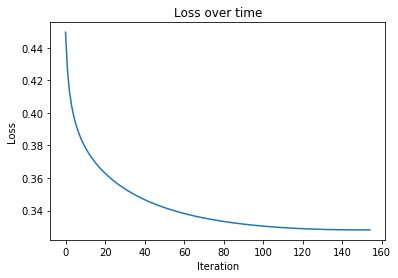

In [151]:
logAdam.plot_loss()

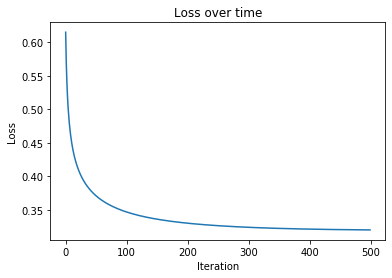

In [152]:
logSGD.plot_loss()

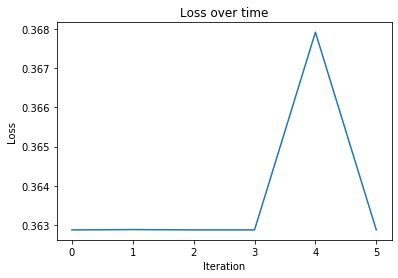

In [153]:
logIRLS.plot_loss()

In [164]:
for key, value in biodegConvergence.items():
    np.save(f"results/loss/{key}/biodeg", np.array(value))

## Comparison with other models

In [184]:
#All
splitting_seeds = [42, 43, 44, 45, 46]

# compAdam = []
# compSGD = []
# compIRLS = []
compLDA = []
compQDA = []
compTree = []
compForest = []

for seed in splitting_seeds:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    
#     logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
#     logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
#     logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
#     logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, patience=5)
#     logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, patience=5)
#     logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, patience=5)
    
#     predAdam = logAdam.predict(Xtest)
#     predSGD = logSGD.predict(Xtest)
#     predIRLS = logIRLS.predict(Xtest)
    
#     compAdam.append(balanced_accuracy_score(ytest,predAdam.round()))
#     compSGD.append(balanced_accuracy_score(ytest,predSGD.round()))
#     compIRLS.append(balanced_accuracy_score(ytest,predIRLS.round()))
    
    lda, qda, tree, forest = fitComparisonModels(Xtrain, ytrain, Xtest)
    
    compLDA.append(balanced_accuracy_score(lda, ytest))
    compQDA.append(balanced_accuracy_score(qda, ytest))
    compTree.append(balanced_accuracy_score(tree, ytest))
    compForest.append(balanced_accuracy_score(forest, ytest))
    
    
biodegComp = { "lda": compLDA,
                "qda": compQDA,
                "dt": compTree,
                "rf": compForest}
    


C:\Users\czerw\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\czerw\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\czerw\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\czerw\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\czerw\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [185]:
biodegComp

{'lda': [0.8376452943382078,
  0.8746081504702194,
  0.8437197131226981,
  0.8548792756539236,
  0.8448529411764706],
 'qda': [0.7385468490878939,
  0.6876175548589342,
  0.7311460469355207,
  0.720667495854063,
  0.691609977324263],
 'dt': [0.8126780626780626,
  0.7882205513784462,
  0.8149949341438704,
  0.8336519114688128,
  0.7826210826210827],
 'rf': [0.8860688956433638,
  0.8345580730761379,
  0.8324658093488467,
  0.887669801462905,
  0.8837929656274981]}

# Parkinson

## Balanced accuracy

In [188]:
parkinson = pd.read_csv("data/big/parkinsons.csv")
y = parkinson["status"].values
X = parkinson.drop(['name', 'status'], axis=1).values

In [53]:
#All
splitting_seeds = [42, 43, 44, 45, 46]

balancedAdam = []
balancedSGD = []
balancedIRLS = []

for seed in splitting_seeds:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=seed)
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xval = scaler.transform(Xval)
    Xtest = scaler.transform(Xtest)

    
    logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
    logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
    logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
    logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    
    predAdam = logAdam.predict(Xtest)
    predSGD = logSGD.predict(Xtest)
    predIRLS = logIRLS.predict(Xtest)
    
    balancedAdam.append(balanced_accuracy_score(ytest,predAdam.round()))
    balancedSGD.append(balanced_accuracy_score(ytest,predSGD.round()))
    balancedIRLS.append(balanced_accuracy_score(ytest,predIRLS.round()))
    

    
parkinsonBalanced = {"adam": balancedAdam,
                    "sgd": balancedSGD,
                    "irls": balancedIRLS}
























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]






















Epoch:: 100%|██████████| 500/500 [00:00<00:00, 2646.31it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]






















Epoch:: 100%|██████████| 500/500 [00:00<00:00, 4202.90it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 365
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss

























Epoch::  49%|████▉     | 244/500 [00:00<00:00, 1952.60it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]






















Epoch:: 100%|██████████| 500/500 [00:00<00:00, 3938.18it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 274
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 13
Reverting to the weights corresponding to the lowest validation loss

























Epoch:: 100%|██████████| 500/500 [00:00<00:00, 3106.60it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]






















Epoch::  39%|███▉      | 197/500 [00:00<00:00, 1951.10it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss

























Epoch:: 100%|██████████| 500/500 [00:00<00:00, 2252.95it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]






















Epoch:: 100%|██████████| 500/500 [00:00<00:00, 4133.48it/s]























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


In [54]:
parkinsonBalanced = {"adam": balancedAdam,
                    "sgd": balancedSGD,
                    "irls": balancedIRLS}

## Convergence

In [75]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)

logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)






























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]




























Epoch::   2%|▏         | 10/500 [00:00<00:05, 91.77it/s]




























Epoch::   4%|▍         | 19/500 [00:00<00:05, 88.29it/s]




























Epoch::   5%|▌         | 27/500 [00:00<00:05, 85.09it/s]




























Epoch::   7%|▋         | 34/500 [00:00<00:05, 79.66it/s]




























Epoch::   8%|▊         | 42/500 [00:00<00:05, 78.59it/s]




























Epoch::  10%|█         | 50/500 [00:00<00:06, 70.44it/s]





























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]




























Epoch::   4%|▎         | 18/500 [00:00<00:02, 169.87it/s]






























Early stopping after epoch 55
Reverting to the weights corresponding to the lowest validation loss


Epoch::   6%|▌         | 29/500 [00:00<00:03, 144.89it/s]




























Epoch::   8%|▊         | 42/500 [00:00<00:04, 100.03it/s]





























Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 54
Reverting to the weights corresponding to the lowest validation loss































Epoch::   0%|          | 1/500 [00:10<1:25:54, 10.33s/it]




























Epoch::   0%|          | 2/500 [00:20<1:24:38, 10.20s/it]




























Epoch::   1%|          | 3/500 [00:30<1:24:08, 10.16s/it]




























Epoch::   1%|          | 4/500 [00:40<1:23:44, 10.13s/it]




























Epoch::   1%|          | 5/500 [00:51<1:25:41, 10.39s/it]




























Epoch::   1%|          | 6/500 [01:01<1:24:36, 10.28s/it]

Early stopping after epoch 6
Reverting to the weights corresponding to the lowest validation loss


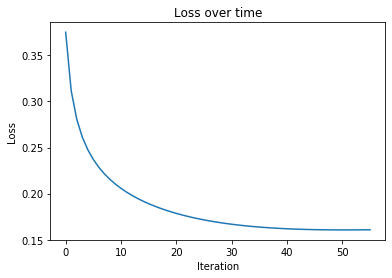

In [76]:
logAdam.plot_loss()

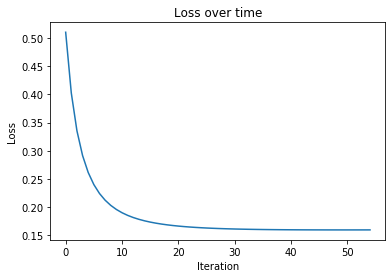

In [77]:
logSGD.plot_loss()

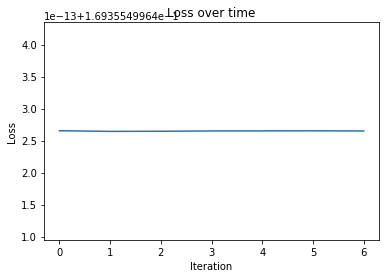

In [78]:
logIRLS.plot_loss()

In [80]:
parkinsonConvergence = {"adam": logAdam.get_params()[4],
                       "sgd": logSGD.get_params()[4],
                       "irls": logIRLS.get_params()[4]}

In [167]:
for key, value in parkinsonConvergence.items():
    np.save(f"results/loss/{key}/parkinson", np.array(value))

## Comparison with other models

In [190]:
#All
splitting_seeds = [42, 43, 44, 45, 46]

# compAdam = []
# compSGD = []
# compIRLS = []
compLDA = []
compQDA = []
compTree = []
compForest = []

for seed in splitting_seeds:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    
#     logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
#     logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
#     logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
#     logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, patience=5)
#     logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, patience=5)
#     logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, patience=5)
    
#     predAdam = logAdam.predict(Xtest)
#     predSGD = logSGD.predict(Xtest)
#     predIRLS = logIRLS.predict(Xtest)
    
#     compAdam.append(balanced_accuracy_score(ytest,predAdam.round()))
#     compSGD.append(balanced_accuracy_score(ytest,predSGD.round()))
#     compIRLS.append(balanced_accuracy_score(ytest,predIRLS.round()))
    
    lda, qda, tree, forest = fitComparisonModels(Xtrain, ytrain, Xtest)
    
    compLDA.append(balanced_accuracy_score(lda, ytest))
    compQDA.append(balanced_accuracy_score(qda, ytest))
    compTree.append(balanced_accuracy_score(tree, ytest))
    compForest.append(balanced_accuracy_score(forest, ytest))
    
    
parkinsonComp = {#"adam": compAdam,
                #"sgd": compSGD,
                #"irls": compIRLS,
                "lda": compLDA,
                "qda": compQDA,
                "dt": compTree,
                "rf": compForest}
    


In [191]:
parkinsonComp

{'lda': [0.7878787878787878,
  0.9375,
  0.8653846153846154,
  0.9310344827586207,
  0.810483870967742],
 'qda': [0.9444444444444444,
  0.8588709677419355,
  0.8831168831168831,
  0.8831168831168831,
  0.9142857142857144],
 'dt': [0.8863636363636365,
  0.7827586206896552,
  0.8041666666666667,
  0.9442857142857143,
  0.7666666666666666],
 'rf': [0.9705882352941176,
  0.9375,
  0.9230769230769231,
  0.9807692307692308,
  0.9111111111111111]}

# Diabetes

## Balanced accuracy

In [192]:
diabetes = pd.read_csv("data/small/diabetes.csv")
y = diabetes["Outcome"].values
X = diabetes.iloc[:, :-1].values

In [50]:
#All
splitting_seeds = [42, 43, 44, 45, 46]

balancedAdam = []
balancedSGD = []
balancedIRLS = []

for seed in splitting_seeds:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=seed)
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xval = scaler.transform(Xval)
    Xtest = scaler.transform(Xtest)

    
    logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
    logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
    logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
    logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    
    predAdam = logAdam.predict(Xtest)
    predSGD = logSGD.predict(Xtest)
    predIRLS = logIRLS.predict(Xtest)
    
    balancedAdam.append(balanced_accuracy_score(ytest,predAdam.round()))
    balancedSGD.append(balanced_accuracy_score(ytest,predSGD.round()))
    balancedIRLS.append(balanced_accuracy_score(ytest,predIRLS.round()))

diabetesBalanced = {"adam": balancedAdam,
                    "sgd": balancedSGD,
                    "irls": balancedIRLS}






















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]




















Epoch::  10%|█         | 50/500 [00:00<00:01, 335.67it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 24
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 68
Reverting to the weights corresponding to the lowest validation loss























Epoch::   0%|          | 1/500 [00:00<04:54,  1.69it/s]




















Epoch::   0%|          | 2/500 [00:01<05:09,  1.61it/s]




















Epoch::   1%|          | 3/500 [00:01<04:59,  1.66it/s]




















Epoch::   1%|          | 4/500 [00:02<04:52,  1.70it/s]




















Epoch::   1%|          | 5/500 [00:03<05:48,  1.42it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]




















Epoch::   4%|▍         | 21/500 [00:00<00:02, 200.06it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss























Epoch::   9%|▉         | 44/500 [00:00<00:02, 154.98it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]




















Epoch::  10%|▉         | 49/500 [00:00<00:01, 295.27it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 65
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 74
Reverting to the weights corresponding to the lowest validation loss























Epoch::   0%|          | 1/500 [00:00<04:59,  1.66it/s]




















Epoch::   0%|          | 2/500 [00:01<04:59,  1.66it/s]




















Epoch::   1%|          | 3/500 [00:01<04:49,  1.72it/s]




















Epoch::   1%|          | 4/500 [00:02<04:45,  1.74it/s]




















Epoch::   1%|          | 5/500 [00:03<05:39,  1.46it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]




















Epoch::   5%|▍         | 24/500 [00:00<00:02, 179.16it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 28
Reverting to the weights corresponding to the lowest validation loss


Epoch::   0%|          | 0/500 [00:00<?, ?it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 44
Reverting to the weights corresponding to the lowest validation loss























Epoch::   0%|          | 1/500 [00:00<04:30,  1.85it/s]




















Epoch::   0%|          | 2/500 [00:01<04:26,  1.87it/s]




















Epoch::   1%|          | 3/500 [00:01<04:31,  1.83it/s]




















Epoch::   1%|          | 4/500 [00:02<04:30,  1.83it/s]




















Epoch::   1%|          | 5/500 [00:02<04:29,  1.83it/s]





















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]





















Epoch::   4%|▍         | 20/500 [00:00<00:02, 194.23it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss
























Epoch::   9%|▉         | 45/500 [00:00<00:02, 206.63it/s]





















Epoch::  15%|█▌        | 76/500 [00:00<00:01, 222.94it/s]






















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]





















Epoch::  10%|█         | 50/500 [00:00<00:00, 495.14it/s]























Early stopping after epoch 84
Reverting to the weights corresponding to the lowest validation loss


Epoch::  19%|█▉        | 97/500 [00:00<00:01, 328.91it/s]






















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 141
Reverting to the weights corresponding to the lowest validation loss
























Epoch::   0%|          | 1/500 [00:00<04:34,  1.82it/s]





















Epoch::   0%|          | 2/500 [00:01<04:45,  1.74it/s]





















Epoch::   1%|          | 3/500 [00:01<04:42,  1.76it/s]





















Epoch::   1%|          | 4/500 [00:02<04:45,  1.74it/s]





















Epoch::   1%|          | 5/500 [00:03<05:41,  1.45it/s]






















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]





















Epoch::   5%|▍         | 23/500 [00:00<00:02, 223.37it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss
























Epoch::   8%|▊         | 42/500 [00:00<00:02, 210.80it/s]





















Epoch::  13%|█▎        | 67/500 [00:00<00:02, 192.59it/s]






















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]





















Epoch::  10%|█         | 50/500 [00:00<00:00, 490.34it/s]























Early stopping after epoch 77
Reverting to the weights corresponding to the lowest validation loss


Epoch::  19%|█▉        | 96/500 [00:00<00:01, 320.10it/s]






















Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 135
Reverting to the weights corresponding to the lowest validation loss
























Epoch::   0%|          | 1/500 [00:00<04:31,  1.84it/s]





















Epoch::   0%|          | 2/500 [00:01<04:37,  1.79it/s]





















Epoch::   1%|          | 3/500 [00:01<04:50,  1.71it/s]





















Epoch::   1%|          | 4/500 [00:02<04:51,  1.70it/s]





















Epoch::   1%|          | 5/500 [00:02<04:40,  1.77it/s]

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


In [51]:
print("adam:", balancedAdam)
print("sgd:", balancedSGD)
print("IRLS:", balancedIRLS)

adam: [0.7640692640692641, 0.746, 0.7289173789173788, 0.7192457220692983, 0.7375621890547264]
sgd: [0.7476136699739184, 0.7426666666666667, 0.7195156695156695, 0.7192457220692983, 0.7356399819086387]
IRLS: [0.7374095883412654, 0.746, 0.7289173789173788, 0.7192457220692983, 0.7337743102668476]


## Convergence

In [83]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=1)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xval = scaler.transform(Xval)

logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]





























Epoch::   2%|▏         | 9/500 [00:00<00:05, 83.36it/s]





























Epoch::   3%|▎         | 17/500 [00:00<00:05, 82.08it/s]





























Epoch::   5%|▌         | 27/500 [00:00<00:05, 86.08it/s]





























Epoch::   7%|▋         | 37/500 [00:00<00:05, 88.64it/s]





























Epoch::   9%|▉         | 45/500 [00:00<00:05, 83.19it/s]





























Epoch::  11%|█         | 54/500 [00:00<00:05, 84.65it/s]





























Epoch::  12%|█▏        | 62/500 [00:00<00:05, 82.18it/s]





























Epoch::  14%|█▍        | 72/500 [00:00<00:05, 85.06it/s]





























Epoch::  17%|█▋        | 85/500 [00:00<00:04, 92.67it/s]





























Epoch::  19%|█▉        | 96/500 [00:01<00:04, 96.26it/s]





























Epoch::  21%|██▏       | 107/500 [

Early stopping after epoch 120
Reverting to the weights corresponding to the lowest validation loss
































Epoch::   7%|▋         | 33/500 [00:00<00:02, 163.65it/s]





























Epoch::  10%|█         | 52/500 [00:00<00:02, 170.31it/s]





























Epoch::  14%|█▍        | 72/500 [00:00<00:02, 176.85it/s]





























Epoch::  18%|█▊        | 90/500 [00:00<00:02, 177.27it/s]





























Epoch::  21%|██▏       | 107/500 [00:00<00:02, 171.86it/s]





























Epoch::  25%|██▍       | 123/500 [00:00<00:02, 164.00it/s]





























Epoch::  29%|██▊       | 143/500 [00:00<00:02, 171.59it/s]





























Epoch::  32%|███▏      | 162/500 [00:00<00:01, 174.31it/s]





























Epoch::  36%|███▌      | 181/500 [00:01<00:01, 177.26it/s]





























Epoch::  40%|████      | 200/500 [00:01<00:01, 178.36it/s]





























Epoch::  44%|████▎     | 218/500 [00:01<00:01, 170.73it/s]





























Epoch:

Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss


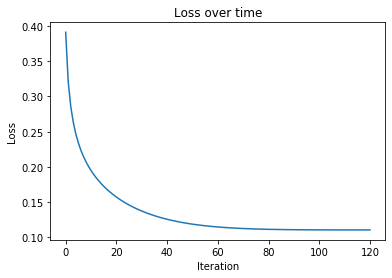

In [84]:
logAdam.plot_loss()

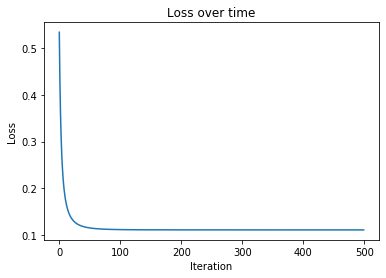

In [85]:
logSGD.plot_loss()

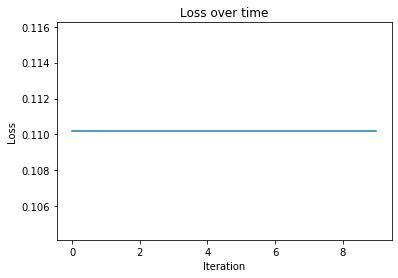

In [86]:
logIRLS.plot_loss()

In [87]:
diabetesConvergence = {"adam": logAdam.get_params()[4],
                       "sgd": logSGD.get_params()[4],
                       "irls": logIRLS.get_params()[4]}

In [169]:
for key, value in diabetesConvergence.items():
    np.save(f"results/loss/{key}/diabetes", np.array(value))

## Comparison with othe models

In [193]:
#All
splitting_seeds = [42, 43, 44, 45, 46]

# compAdam = []
# compSGD = []
# compIRLS = []
compLDA = []
compQDA = []
compTree = []
compForest = []

for seed in splitting_seeds:
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xtest = scaler.transform(Xtest)

    
#     logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
#     logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
#     logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
#     logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, patience=5)
#     logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, patience=5)
#     logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, patience=5)
    
#     predAdam = logAdam.predict(Xtest)
#     predSGD = logSGD.predict(Xtest)
#     predIRLS = logIRLS.predict(Xtest)
    
#     compAdam.append(balanced_accuracy_score(ytest,predAdam.round()))
#     compSGD.append(balanced_accuracy_score(ytest,predSGD.round()))
#     compIRLS.append(balanced_accuracy_score(ytest,predIRLS.round()))
    
    lda, qda, tree, forest = fitComparisonModels(Xtrain, ytrain, Xtest)
    
    compLDA.append(balanced_accuracy_score(lda, ytest))
    compQDA.append(balanced_accuracy_score(qda, ytest))
    compTree.append(balanced_accuracy_score(tree, ytest))
    compForest.append(balanced_accuracy_score(forest, ytest))
    
    
diabetesComp = {#"adam": compAdam,
                #"sgd": compSGD,
                #"irls": compIRLS,
                "lda": compLDA,
                "qda": compQDA,
                "dt": compTree,
                "rf": compForest}
    


In [194]:
diabetesComp

{'lda': [0.7873541349568747,
  0.7931034482758621,
  0.7594456770091724,
  0.7485247679499856,
  0.7669895076674738],
 'qda': [0.7880856635181894,
  0.7534468775344687,
  0.7183343434021243,
  0.7132800608828006,
  0.7464285714285714],
 'dt': [0.9741935483870967,
  0.9807692307692308,
  0.9676011029411764,
  0.9740041928721175,
  0.9640880842248645],
 'rf': [0.9784894194832083,
  0.9799442299442299,
  0.9752710317800852,
  0.9719728425541465,
  0.9886928991406603]}

## Interactions

In [171]:
Xint = createFeatureInteractions(X)

In [172]:
splitting_seeds = [42, 43, 44, 45, 46]

intAdam = []
intSGD = []
intIRLS = []

for seed in splitting_seeds:
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xint, y, test_size=0.2, random_state=seed)
    Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=seed)
    
    scaler = StandardScaler()
    Xtrain = scaler.fit_transform(Xtrain)
    Xval = scaler.transform(Xval)
    Xtest = scaler.transform(Xtest)

    
    logAdam = LogisticRegression(input_dim=Xtrain.shape[1])
    logSGD = LogisticRegression(input_dim=Xtrain.shape[1])
    logIRLS = LogisticRegression(input_dim=Xtrain.shape[1])
    logAdam.train(Xtrain, ytrain, optimizer=AdamOptim(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logSGD.train(Xtrain, ytrain, optimizer=SGD(eta=0.01), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    logIRLS.train(Xtrain, ytrain, optimizer=IRLS(), epochs=500, batch_size=32, X_val=Xval, y_val=yval, patience=5)
    
    predAdam = logAdam.predict(Xtest)
    predSGD = logSGD.predict(Xtest)
    predIRLS = logIRLS.predict(Xtest)
    
    intAdam.append(balanced_accuracy_score(ytest,predAdam.round()))
    intSGD.append(balanced_accuracy_score(ytest,predSGD.round()))
    intIRLS.append(balanced_accuracy_score(ytest,predIRLS.round()))
    

    
diabetesInt = {"adam": intAdam,
                    "sgd": intSGD,
                    "irls": intIRLS}















































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]














































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]














































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

Early stopping after epoch 20
Reverting to the weights corresponding to the lowest validation loss
Early stopping after epoch 38
Reverting to the weights corresponding to the lowest validation loss
















































Epoch::   0%|          | 1/500 [00:00<05:53,  1.41it/s]













































Epoch::   0%|          | 2/500 [00:01<05:55,  1.40it/s]













































Epoch::   1%|          | 3/500 [00:02<05:51,  1.41it/s]













































Epoch::   1%|          | 4/500 [00:02<05:52,  1.41it/s]













































Epoch::   1%|          | 5/500 [00:03<05:47,  1.42it/s]













































Epoch::   1%|          | 6/500 [00:04<05:48,  1.42it/s]













































Epoch::   1%|▏         | 7/500 [00:04<05:45,  1.43it/s]













































Epoch::   2%|▏         | 8/500 [00:05<05:41,  1.44it/s]













































Epoch::   2%|▏         | 9/500 [00:06<05:41,  1.44it/s]













































Epoch::   2%|▏         | 10/500 [00:07<05:41,

Early stopping after epoch 12
Reverting to the weights corresponding to the lowest validation loss

















































Epoch::   8%|▊         | 38/500 [00:00<00:02, 183.81it/s]














































Epoch::  12%|█▏        | 60/500 [00:00<00:02, 191.85it/s]














































Epoch::  15%|█▌        | 77/500 [00:00<00:02, 184.14it/s]














































Epoch::  19%|█▉        | 96/500 [00:00<00:02, 185.34it/s]














































Epoch::  23%|██▎       | 116/500 [00:00<00:02, 186.34it/s]














































Epoch::  27%|██▋       | 137/500 [00:00<00:01, 191.82it/s]














































Epoch::  33%|███▎      | 163/500 [00:00<00:01, 206.73it/s]














































Epoch::  38%|███▊      | 188/500 [00:00<00:01, 215.81it/s]














































Epoch::  42%|████▏     | 211/500 [00:01<00:01, 219.27it/s]














































Epoch::  47%

Early stopping after epoch 320
Reverting to the weights corresponding to the lowest validation loss


Epoch::  15%|█▌        | 76/500 [00:00<00:01, 382.16it/s]















































Epoch::  23%|██▎       | 115/500 [00:00<00:01, 382.25it/s]















































Epoch::  32%|███▏      | 158/500 [00:00<00:00, 394.37it/s]















































Epoch::  38%|███▊      | 189/500 [00:00<00:00, 355.86it/s]















































Epoch::  45%|████▌     | 226/500 [00:00<00:00, 358.97it/s]















































Epoch::  52%|█████▏    | 258/500 [00:00<00:00, 339.73it/s]















































Epoch::  59%|█████▊    | 293/500 [00:00<00:00, 341.78it/s]















































Epoch::  66%|██████▌   | 331/500 [00:00<00:00, 351.46it/s]















































Epoch::  73%|███████▎  | 366/500 [00:01<00:00, 346.88it/s]















































Epoch::  80%|████████  | 400/500 [00:01<00:00, 

Early stopping after epoch 9
Reverting to the weights corresponding to the lowest validation loss


















































Epoch::   6%|▌         | 30/500 [00:00<00:03, 154.42it/s]















































Epoch::   9%|▉         | 47/500 [00:00<00:02, 157.92it/s]















































Epoch::  14%|█▍        | 72/500 [00:00<00:02, 176.79it/s]















































Epoch::  19%|█▉        | 97/500 [00:00<00:02, 192.94it/s]















































Epoch::  24%|██▍       | 119/500 [00:00<00:01, 199.26it/s]















































Epoch::  29%|██▉       | 145/500 [00:00<00:01, 212.72it/s]















































Epoch::  33%|███▎      | 166/500 [00:00<00:01, 204.49it/s]















































Epoch::  38%|███▊      | 190/500 [00:00<00:01, 211.74it/s]















































Epoch::  42%|████▏     | 211/500 [00:01<00:01, 199.78it/s]















































Ep

Early stopping after epoch 490
Reverting to the weights corresponding to the lowest validation loss


Epoch::  15%|█▌        | 77/500 [00:00<00:01, 397.27it/s]
















































Epoch::  24%|██▎       | 118/500 [00:00<00:00, 398.70it/s]
















































Epoch::  32%|███▏      | 160/500 [00:00<00:00, 400.27it/s]
















































Epoch::  39%|███▉      | 196/500 [00:00<00:00, 383.60it/s]
















































Epoch::  46%|████▌     | 228/500 [00:00<00:00, 358.40it/s]
















































Epoch::  54%|█████▎    | 268/500 [00:00<00:00, 366.92it/s]
















































Epoch::  60%|██████    | 302/500 [00:00<00:00, 357.31it/s]
















































Epoch::  67%|██████▋   | 336/500 [00:00<00:00, 344.49it/s]
















































Epoch::  75%|███████▍  | 373/500 [00:01<00:00, 349.80it/s]
















































Epoch::  82%|████████▏ | 412/500 [00:0

Early stopping after epoch 8
Reverting to the weights corresponding to the lowest validation loss




















































Epoch::   8%|▊         | 38/500 [00:00<00:02, 177.67it/s]

















































Epoch::  11%|█         | 55/500 [00:00<00:02, 173.17it/s]

















































Epoch::  14%|█▍        | 71/500 [00:00<00:02, 167.95it/s]

















































Epoch::  17%|█▋        | 85/500 [00:00<00:02, 157.94it/s]

















































Epoch::  20%|█▉        | 99/500 [00:00<00:02, 150.15it/s]

















































Epoch::  23%|██▎       | 113/500 [00:00<00:02, 143.80it/s]

















































Epoch::  26%|██▌       | 131/500 [00:00<00:02, 152.27it/s]

















































Epoch::  30%|███       | 152/500 [00:00<00:02, 165.18it/s]

















































Epoch::  35%|███▍      | 173/500 [00:01<00:01, 176.05it/s]


































Epoch::  51%|█████     | 254/500 [00:00<00:00, 355.86it/s]

















































Epoch::  57%|█████▋    | 287/500 [00:00<00:00, 329.01it/s]

















































Epoch::  65%|██████▍   | 323/500 [00:00<00:00, 336.81it/s]

















































Epoch::  71%|███████   | 356/500 [00:01<00:00, 333.76it/s]

















































Epoch::  78%|███████▊  | 389/500 [00:01<00:00, 331.65it/s]

















































Epoch::  86%|████████▌ | 430/500 [00:01<00:00, 348.26it/s]

















































Epoch:: 100%|██████████| 500/500 [00:01<00:00, 345.89it/s]


















































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]

















































Epoch::   0%|          | 1/500 [00:00<05:55,  1.40it/s]

















































Epoch::   0%|          | 2/500 [00:01<05:

Early stopping after epoch 11
Reverting to the weights corresponding to the lowest validation loss





















































Epoch::  10%|▉         | 48/500 [00:00<00:01, 241.31it/s]


















































Epoch::  14%|█▍        | 71/500 [00:00<00:01, 237.09it/s]


















































Epoch::  18%|█▊        | 92/500 [00:00<00:01, 223.90it/s]


















































Epoch::  22%|██▏       | 111/500 [00:00<00:01, 211.83it/s]


















































Epoch::  27%|██▋       | 133/500 [00:00<00:01, 213.62it/s]


















































Epoch::  31%|███       | 156/500 [00:00<00:01, 217.06it/s]


















































Epoch::  35%|███▌      | 176/500 [00:00<00:01, 211.00it/s]


















































Epoch::  40%|███▉      | 199/500 [00:00<00:01, 215.77it/s]


















































Epoch::  44%|████▍     | 221/500 [00:01<00:01, 215.76it/s]























Epoch::  68%|██████▊   | 340/500 [00:01<00:00, 337.39it/s]


















































Epoch::  76%|███████▌  | 380/500 [00:01<00:00, 351.24it/s]


















































Epoch::  84%|████████▍ | 421/500 [00:01<00:00, 365.09it/s]


















































Epoch::  92%|█████████▏| 458/500 [00:01<00:00, 349.95it/s]


















































Epoch:: 100%|██████████| 500/500 [00:01<00:00, 340.94it/s]



















































Epoch::   0%|          | 0/500 [00:00<?, ?it/s]


















































Epoch::   0%|          | 1/500 [00:00<05:25,  1.53it/s]


















































Epoch::   0%|          | 2/500 [00:01<05:32,  1.50it/s]


















































Epoch::   1%|          | 3/500 [00:02<05:38,  1.47it/s]


















































Epoch::   1%|          | 4/500 [00:02<

Early stopping after epoch 5
Reverting to the weights corresponding to the lowest validation loss


In [103]:
diabetesInt

{'adam': [0.7578177516065715,
  0.7806666666666666,
  0.7615384615384615,
  0.7383296915349471,
  0.7622682044323835],
 'sgd': [0.7544163910623538,
  0.7586666666666667,
  0.7441595441595441,
  0.7344135758676467,
  0.7527137042062415],
 'irls': [0.7694469091984619,
  0.7686666666666666,
  0.753988603988604,
  0.7253185391185901,
  0.7528833107191316]}

In [173]:
diabetesIntConvergence = {"adam": logAdam.get_params()[4],
                       "sgd": logSGD.get_params()[4],
                       "irls": logIRLS.get_params()[4]}

In [174]:
for key, value in diabetesIntConvergence.items():
    np.save(f"results/loss/{key}/diabetesInt", np.array(value))

# wraping up the results

In [176]:
balancedAccuracy = pd.DataFrame(columns=["data_set", "optimizer", "seed_42_acc", "seed_43_acc", "seed_44_acc", "seed_45_acc", "seed_46_acc"])

In [180]:
balanced = {"biodeg": biodegBalanced,
           "parkinson": parkinsonBalanced,
           "diabetes": diabetesBalanced}
for dataSetName, value in balanced.items():
    for opt, acc in value.items():
        balancedAccuracy.loc[balancedAccuracy.shape[0]] = [dataSetName+"_data", opt] + acc

In [197]:
comp = {"biodeg": biodegComp,
           "parkinson": parkinsonComp,
           "diabetes": diabetesComp}
for dataSetName, value in comp.items():
    for opt, acc in value.items():
        balancedAccuracy.loc[balancedAccuracy.shape[0]] = [dataSetName+"_data", opt] + acc

In [200]:
for opt, acc in diabetesInt.items():
    balancedAccuracy.loc[balancedAccuracy.shape[0]] = ["diabetes_data", opt+"+int"] + acc

In [201]:
balancedAccuracy

,data_set,optimizer,seed_42_acc,seed_43_acc,seed_44_acc,seed_45_acc,seed_46_acc
0,biodeg_data,adam,0.853137,0.846035,0.855349,0.873536,0.860490
1,biodeg_data,sgd,0.864167,0.860651,0.862977,0.860234,0.849461
2,biodeg_data,irls,0.853824,0.831420,0.808837,0.881179,0.850147
3,parkinson_data,adam,0.667411,0.812500,0.757143,0.824286,0.748276
4,parkinson_data,sgd,0.683036,0.875000,0.797143,0.852857,0.681034
5,parkinson_data,irls,0.738839,0.968750,0.852857,0.872857,0.763793
6,diabetes_data,adam,0.764069,0.746000,0.728917,0.719246,0.737562
7,diabetes_data,sgd,0.747614,0.742667,0.719516,0.719246,0.735640
8,diabetes_data,irls,0.737410,0.746000,0.728917,0.719246,0.733774
9,biodeg_data,lda,0.837645,0.874608,0.843720,0.854879,0.844853


In [203]:
balancedAccuracy.to_csv("results/balancedAccuracy.csv", index=False)